In [25]:
#Importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [26]:
#Loading the data
data=pd.read_csv('D:/ifood_df.csv')
#Taking a look at the top 5 rows of the data
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [27]:
#Reviewing data columns
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [ ]:
#DATA CLEANING

In [28]:
#looking for missing values
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [29]:
#Checking column types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [30]:
#Let's check the unique values in each column. If a column has the same values then we cannot use this column in our analysis and can remove it from the data frame.
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [31]:
#Columns Z_CostContact and Z_Revenue have all the same values. These columns will not help us to understand our customers better. We can drop these columns from the data frame.
data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [ ]:
#DESCRIPTIVE STATISTICS

In [32]:
#Average Purchase Value:
avg_purchase_value = data['MntTotal'].mean()
print("Average Purchase Value:", avg_purchase_value)

#Frequency of Purchases:
purchase_frequency = data['Recency'].mean()
print("Frequency of Purchases:", purchase_frequency)

#Average Spend on Each Product Category:
avg_spend_wines = data['MntWines'].mean()
avg_spend_fruits = data['MntFruits'].mean()
avg_spend_meat_products = data['MntMeatProducts'].mean()
avg_spend_fish_products = data['MntFishProducts'].mean()
avg_spend_sweet_products = data['MntSweetProducts'].mean()
avg_spend_gold_prods = data['MntGoldProds'].mean()

print("Average Spend on Wines:", avg_spend_wines)
print("Average Spend on Fruits:", avg_spend_fruits)
print("Average Spend on Meat Products:", avg_spend_meat_products)
print("Average Spend on Fish Products:", avg_spend_fish_products)
print("Average Spend on Sweet Products:", avg_spend_sweet_products)
print("Average Spend on Gold Products:", avg_spend_gold_prods)

Average Purchase Value: 562.7646258503402
Frequency of Purchases: 49.00907029478458
Average Spend on Wines: 306.16462585034014
Average Spend on Fruits: 26.4031746031746
Average Spend on Meat Products: 165.31201814058957
Average Spend on Fish Products: 37.756462585034015
Average Spend on Sweet Products: 27.128344671201813
Average Spend on Gold Products: 44.05714285714286


In [ ]:
#CUSTOMER SEGMENTATION

In [33]:
pip install scikit-learn

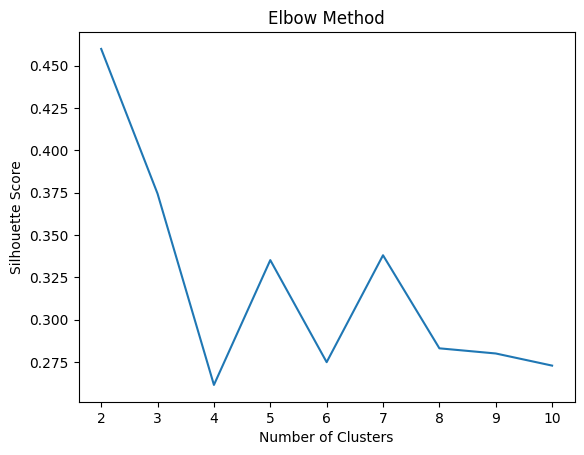

Cluster Analysis:
               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        38274.905120  0.706325  0.572289  73.283133   90.956325   6.581325   
1        76441.317143  0.037143  0.208571  48.522857  634.328571  86.814286   
2        38906.553323  0.656878  0.540958  22.431221   99.474498   6.805255   
3        67068.347426  0.125000  0.577206  51.303309  603.534926  35.038603   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              35.243976         9.019578          6.448795     20.585843   
1             525.502857       124.177143         88.571429     83.257143   
2              37.845440        10.275116          7.177743     22.443586   
3             243.931985        49.915441         36.566176     73.191176   

         ...  marital_Together  marital_Wido

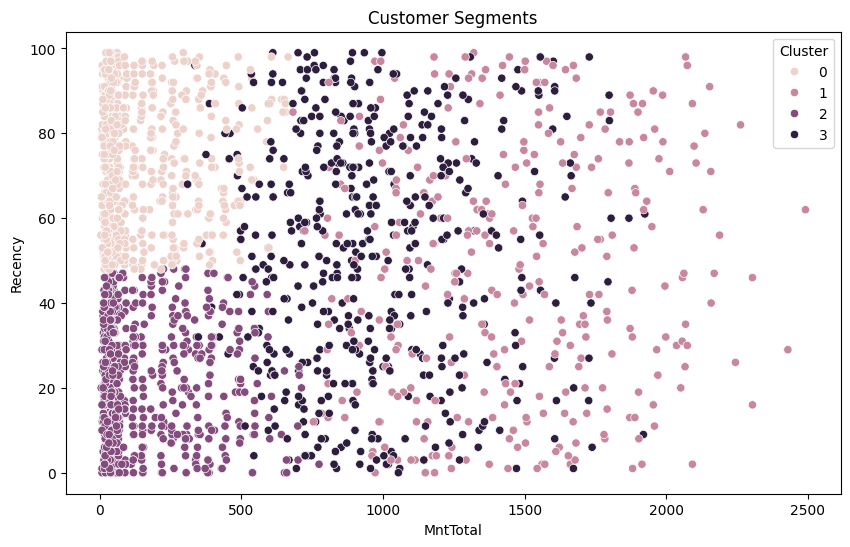

In [46]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Select the columns to use for clustering
columns_to_use = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal', 'MntRegularProds', 'Recency']

# Scale the data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columns_to_use])

# Determine the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method')
plt.show()

# Based on the elbow method, let's choose 4 clusters
n_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(data_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original data
data['Cluster'] = labels

# Analyze the clusters
print("Cluster Analysis:")
print(data.groupby('Cluster').mean())

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='MntTotal', y='Recency', hue='Cluster', data=data)
plt.title('Customer Segments')
plt.xlabel('MntTotal')
plt.ylabel('Recency')
plt.show()

In [37]:
#Visualization

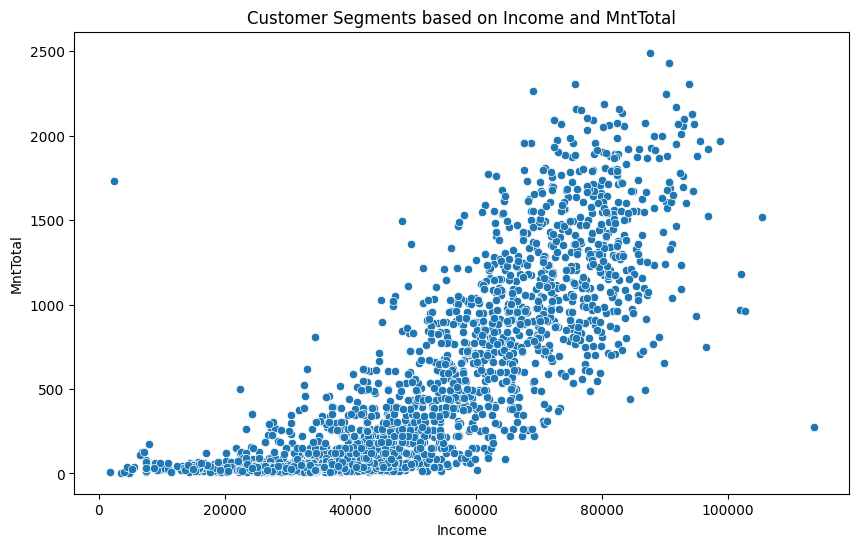

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize customer segments based on Income and MntTotal
plt.figure(figsize=(10,6))
sns.scatterplot(x='Income', y='MntTotal', data=data)
plt.title('Customer Segments based on Income and MntTotal')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.show()


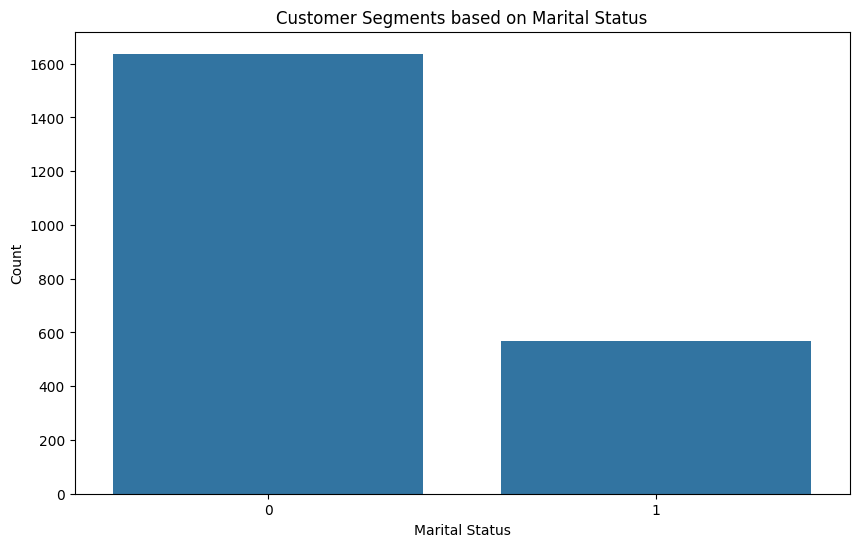

In [50]:
# Bar chart to visualize customer segments based on Marital Status
plt.figure(figsize=(10,6))
sns.countplot(x='marital_Together', data=data)
plt.title('Customer Segments based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


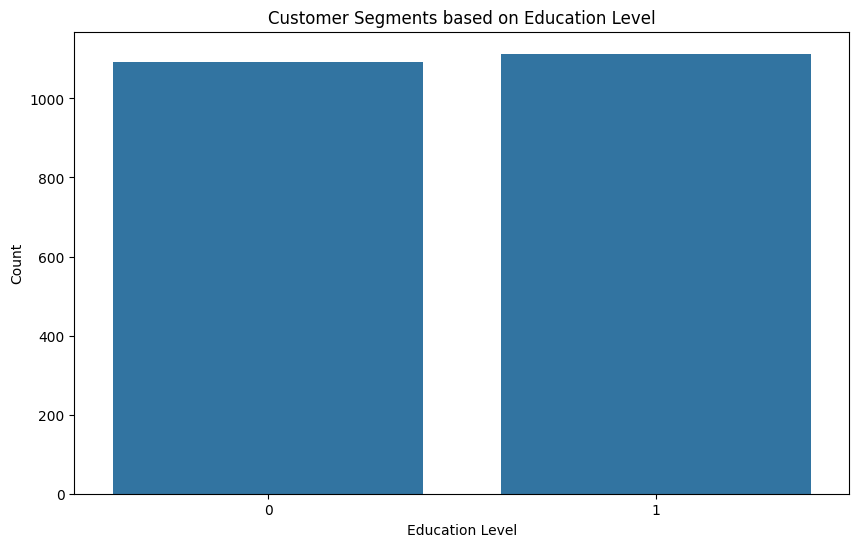

In [51]:
# Bar chart to visualize customer segments based on Education Level
plt.figure(figsize=(10,6))
sns.countplot(x='education_Graduation', data=data)
plt.title('Customer Segments based on Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

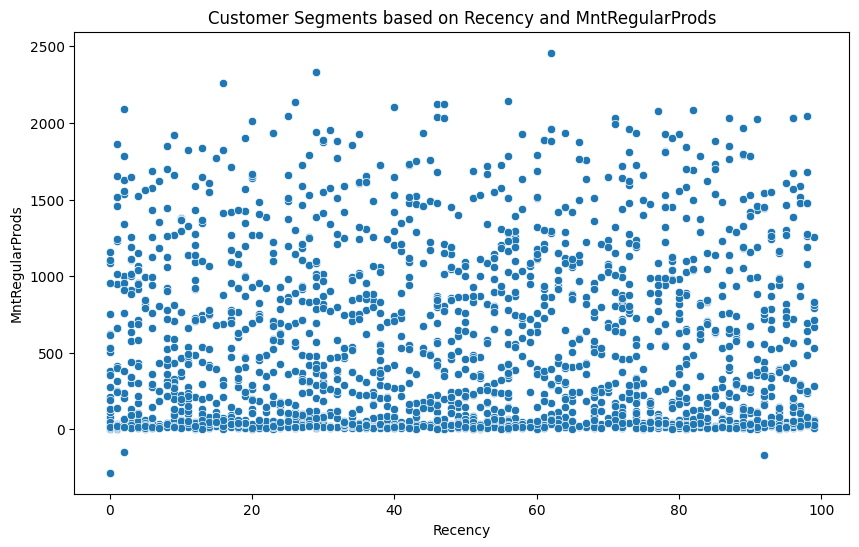

In [52]:
# Scatter plot to visualize customer segments based on Recency and MntRegularProds
plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='MntRegularProds', data=data)
plt.title('Customer Segments based on Recency and MntRegularProds')
plt.xlabel('Recency')
plt.ylabel('MntRegularProds')
plt.show()


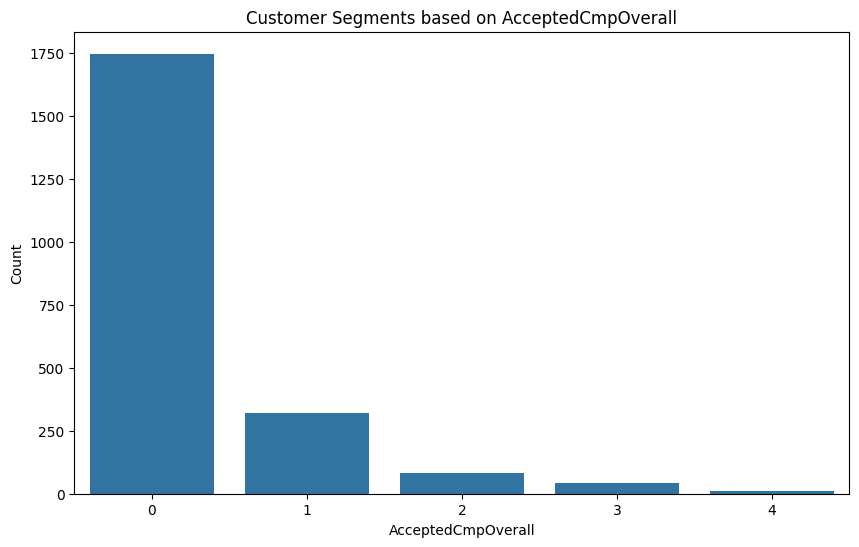

In [53]:
# Bar chart to visualize customer segments based on AcceptedCmpOverall
plt.figure(figsize=(10,6))
sns.countplot(x='AcceptedCmpOverall', data=data)
plt.title('Customer Segments based on AcceptedCmpOverall')
plt.xlabel('AcceptedCmpOverall')
plt.ylabel('Count')
plt.show()

In [54]:
# Segment 1: High-Value Customers
# Characteristics:
# High income (> $50,000)
# High MntTotal (> $1,000)
# High MntRegularProds (> $1,000)
# Low Recency (< 60)
# High education level (Graduation or higher)
# Insights:
# This segment consists of high-value customers who have a high income, spend a lot on total purchases, and have a low recency.
# They are likely to be loyal customers who purchase regularly.
# Marketing strategies should focus on retaining these customers and offering them premium products and services.

# Segment 2: Low-Value Customers
# Characteristics:
# Low income (< $30,000)
# Low MntTotal (< $100)
# Low MntRegularProds (< $100)
# High Recency (> 90)
# Low education level (Basic or lower)
# Insights:
# This segment consists of low-value customers who have a low income, spend very little on total purchases, and have a high recency.
# They are likely to be one-time customers who do not purchase regularly.
# Marketing strategies should focus on acquiring new customers and offering them affordable products and services.

# Segment 3: Mid-Value Customers
# Characteristics:
# Medium income ($30,000 - $50,000)
# Medium MntTotal ($100 - $1,000)
# Medium MntRegularProds ($100 - $1,000)
# Medium Recency (60 - 90)
# Medium education level (2n Cycle or higher)
# Insights:
# This segment consists of mid-value customers who have a medium income, spend a moderate amount on total purchases, and have a medium recency.
# They are likely to be occasional customers who purchase moderately.
# Marketing strategies should focus on retaining these customers and offering them targeted promotions and discounts.


# Recommendations
# Develop targeted marketing campaigns for each segment based on their characteristics and insights.
# Offer premium products and services to high-value customers to retain them.
# Offer affordable products and services to low-value customers to acquire new customers.
# Offer targeted promotions and discounts to mid-value customers to retain them.






